# TP 2: Regression and Cross Validation for Network Data Analysis

## 📝 Exercise 1: Linear Regression with Training and Test Data

In this exercise, you will revisit simple linear regression exercise from last week but this time with a focus on model training and evaluation using a train/test split.

### Step 1: Import Required Libraries

First, let's import the necessary libraries for data manipulation, visualization and regression modeling.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

### Step 2: Generate the Data

Before training a model, we need data that represents the problem we want to solve. In this lab, we use a predefined function `genSample()` to simulate synthetic data that mimics real-world behavior (e.g network-related variables).

* a) Use the provided `genSample()` function from the previous lab session to generate your dataset.

    - Choose appropriate parameters: number of samples, intercept, slope and noise level
    - Store the output into variables for input features and target labels

#### Answer:

In [24]:
## TODO:

def genSample(n, b0, b1, sigmae, xLow, xHigh, seedit=199, size=1):
    if type(seedit) == int:
        np.random.seed(seedit)
        Er = np.random.normal(mue, sigmae, n)
        x = []
        for k in range(size):
            np.random.seed(seedit + k)
            x.append(np.random.uniform(xl, xh, n))
    else:
        np.random.seed()
        Er = np.random.normal(mue, sigmae, n)
        x = []
        for k in range(size):
            np.random.seed()
            x.append(np.random.uniform(xl, xh, n))
        
    # Compute y
    y = b0 + Er
    for k in range(size):
        y += b1[k] * x[k]

    # Output
    if size == 1:
        return (x[0], y, Er)
    else:
        return (x, y, Er)

In [27]:
# Generate synthetic data


# Parameters for simple linear regression
n = 20          # number of samples
b0 = 2          # intercept
b1 = np.array([3])         # slope 
sigmae = 1.0    # standard deviation of the noise
xl = 0          # lower bound of x
xh = 10         # upper bound of x

# Generate synthetic data
(x, y, Er) = genSample(n, b0, b1, sigmae, xl, xh, seedit=42, size=1)

# Display the results
print("x =", x)
print("y =", y)
print("Er =", Er)

x = [3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914 ]
y = [13.73291772 30.38316489 24.60750679 21.48278438  6.44640584  6.44569865
  5.32172118 28.7527191  19.56397597 23.78473738  2.15411714 30.63156581
 27.2152415   6.45689308  5.72983118  6.93984777 10.11443617 18.05694028
 14.05032648  9.3245705 ]
Er = [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037 ]


### Step 3: Split the Dataset

When building predictive models, we want to know not only how well the model fits the **data it sees**, but also how well it will perform on **unseen data**. 

To do this, we split the dataset into two parts:
- A **training set** to learn from
- A **test set** to evaluate generalization

This helps prevent **overfitting** and provides a more realistic estimate of how your model will perform in production or deployment.

* b) Split the dataset into a **training set** and a **test set**.

    - Use `train_test_split()` from `sklearn.model_selection`
    - Set a test size of 20% and use a random seed for reproducibility

#### Answer:

In [28]:
## TODO:

x = x.reshape(-1, 1)   # converts from (100,) to (100, 1)


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


print("Training set size:", x_train.shape[0])
print("Test set size:", x_test.shape[0])
print("\nFirst 5 training samples (x, y):")
print(np.column_stack((x_train[:5], y_train[:5])))

Training set size: 16
Test set size: 4

First 5 training samples (x, y):
[[ 6.01115012 19.56397597]
 [ 1.5599452   6.44569865]
 [ 9.69909852 30.63156581]
 [ 5.98658484 21.48278438]
 [ 4.31945019 14.05032648]]


### Step 4: Train the Model

Once the data is split, the next step is to fit a linear regression model using only the training set. This means the model will learn the best-fitting line by minimizing the error between the predicted and actual values on the training data. 

* c) Create and train a linear regression model using only the **training data**.

    - Use `LinearRegression()` from `sklearn.linear_model`
    - Fit the model using `.fit(...)` with your training inputs and outputs

#### Answer:

In [29]:
## TODO:

from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(x_train, y_train)


print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_)


Intercept (b0): 1.2771259064553817
Slope (b1): [3.11276536]


### Step 5: Make Predictions

Once the model is trained, you can use it to predict outcomes for the test set, which simulates new, unseen data. This step evaluates how well the model generalizes.

* d) Use the trained model to predict the outputs for your test set.

    - Use the `.predict(...)` method
    - Store the predicted values for comparison with the actual test labels

#### Answer:

In [31]:
## TODO:


y_pred = model.predict(x_test)

print("Predicted values :", y_pred)
print("Actual values :", y_test)

Predicted values : [12.93568099 17.61156234  6.98607796 30.87063152]
Actual values : [13.73291772 18.05694028  6.93984777 30.38316489]


### Step 6: Evaluate the Model

To measure how well the model performs, we use quantitative evaluation metrics. Two common ones are:

- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values
- **R² Score**: Indicates how much of the variance in the output variable is explained by the model (closer to 1 is better)

A low MSE and high R² generally indicate a good model fit.

* e) Evaluate the accuracy of your predictions using the test data.

    - Compute **Mean Squared Error (MSE)** using `mean_squared_error(...)`
    - Compute **R² Score** using `r2_score(...)`

* f) Comment on the results.
    - Do the MSE and R² scores indicate a good fit on the test set?
    - What might cause a model to perform poorly on test data, even if it performs well on the training data?
    - Is there any indication of overfitting or underfitting?

#### Answer:

In [32]:
## TODO:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse, 3))
print("R² Score:", round(r2, 3))

Mean Squared Error (MSE): 0.268
R² Score: 0.996


The model fits the test set very well, as shown by the low MSE of 0.268 and the high R² score of 0.996; a model might perform poorly on test data if it overfits the training data, is too simple, or if the data is noisy or comes from a different distribution; in this case, there is no indication of overfitting or underfitting, so the model generalizes excellently.

### Step 7: Visualize the Results

Visualizing your model’s predictions helps you understand how well it fits the data. A well-fitted model should have its regression line align closely with the true data points in the test set.

* g) Plot the following on a graph:

    - The original test data (as a scatter plot)
    - The model’s predicted outputs (regression line)
    - Add axis labels, a title, and a legend.

#### Answer:

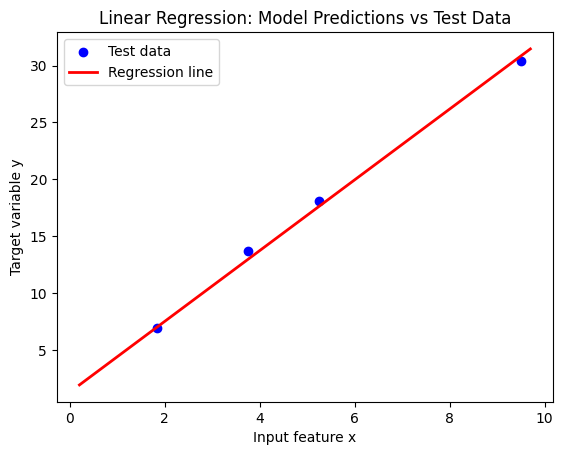

In [33]:
## TODO:

# Plot the test data points
plt.scatter(x_test, y_test, color='blue', label='Test data')

# Plot the regression line

x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression line')


plt.xlabel('Input feature x')
plt.ylabel('Target variable y')
plt.title('Linear Regression: Model Predictions vs Test Data')
plt.legend()
plt.show()

## 📝 Exercise 2: Polynomial Regression

In this exercise, you will explore **polynomial regression** as an extension of linear models. Polynomial regression allows us to fit more complex, non-linear relationships by using polynomial features derived from a single input variable.

We are going to generate synthetic data based on a non-linear, degree-3 polynomial function: $y = 4 + 2x + 0.5x^2 - 0.07x^3 + \epsilon$.

* The input $x$ is sampled uniformly from the interval [0, 10].
* The noise $\epsilon$ is sampled from a normal distribution with mean 0 and standard deviation $\sigma = 5$.

This is a cubic polynomial with Gaussian noise added. This equation represents the hidden ground truth that we will later try to discover using regression.

You will then fit regression models of varying polynomial degrees (from 1 to 16) and evaluate how well they approximate the true curve.

The general form of a polynomial regression model with degree $\ell$ is: $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x + \hat{\beta}_2x^2 +\ldots + \hat{\beta}_{\ell}x^{\ell}$.

Although you are still working with a single input variable $x$, transforming it into $x^2, x^3, \ldots$ means the model effectively operates in a **higher-dimensional space**.

Your task is to evaluate how different polynomial degrees affect the model's performance and generalization.

### Step 1: Generate Synthetic Data

Using the following parameters:
- $\sigma = 5$ (standard deviation of the noise)
- $n = 200$ data points
- $x \sim \text{Uniform}(0, 10)$

We generate data for:
  - Feature: $x$
  - Derived features: $x^2, x^3$
  - Noise: $\varepsilon \sim \mathcal{N}(0, \sigma^2)$
  - Target: $y = 4 + 2x + 0.5x^2 - 0.07x^3 + \varepsilon$

In [8]:
# Parameters
n = 200
b0 = 4
b1 = np.array([2,0.5,-0.07])
mue, sigmae = 0, 5
xl, xh = 0, 10

# Set random seed for reproducibility
np.random.seed(199)
Er = np.random.normal(mue, sigmae, n)
np.random.seed(199)

# Generate synthetic x values
x0 = np.random.uniform(xl,xh,n)
x = np.array([x0])
x = np.append(x,np.array([x0**2]),axis=0)
x = np.append(x,np.array([x0**3]),axis=0)


# Generate true y values using the polynomial plus noise
y = b0 + b1[0]*x[0]+ b1[1]*x[1]+ b1[2]*x[2]+Er

Then we store the data in data frames and prepare it for polynomial regression. From this point on you don't know how this data was produced, you just have the data on x and y as a data frame and are asked to do a regression.

In [9]:
dataSynth = {'x': x[0],'y': y}
df = pd.DataFrame(data=dataSynth)
df

,x,y
0,6.547917,24.421765
1,9.820393,3.953867
2,3.999047,26.961203
3,8.441526,5.177844
4,4.638424,9.378242
...,...,...
195,3.032599,8.649734
196,6.540144,19.545533
197,6.284375,20.354621
198,5.722965,23.608383


### Step 2: Split the Dataset

We have to split the data into training set and test set.

* a) Split the data into a **training set** and a **test set** using an 80/20 ratio.

    - Use `train_test_split()` from `sklearn.model_selection`
    - Set a random seed for reproducibility

#### Answer:

In [34]:
## TODO:

# Separate features and target
X = df[['x']]   # DataFrame with feature(s)
y = df['y']     # Series with target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 160
Test set size: 40


### Step 3: Explore the Effect of Polynomial Degree

In this part, you will investigate how changing the **degree ℓ of the polynomial** affects the model’s ability to fit and generalize.

Polynomial regression is still linear regression but applied to transformed features: $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x + \hat{\beta}_2 x^2 + \dots + \hat{\beta}_\ell x^\ell$

* b) Fit a regression model to the training data. 
* c) Predict the output on the test set.
* d) Plot the resulting regression curve along with the original data points
* e) Print the MSE and R² score for the test set
* f) Does the degree-3 polynomial fit the shape of the true curve well? Comment on R² score?

#### Answer:

c:\Users\david\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


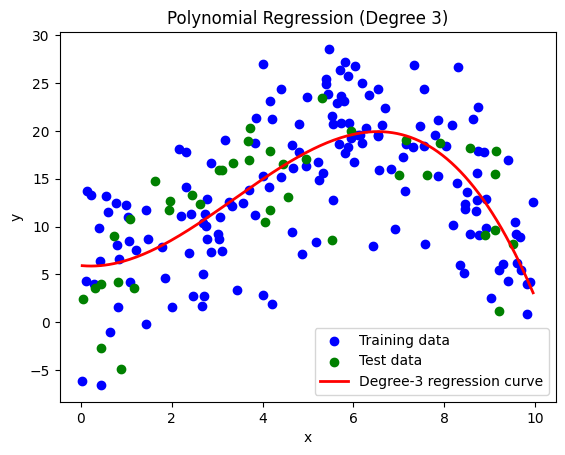

Mean Squared Error (MSE) on test set: 21.822
R² Score on test set: 0.490

Comment:
The degree-3 polynomial captures the general shape of the true curve, but due to the high noise level in the data,
the model only explains about half of the variance (R² = 0.49) and shows a relatively high MSE (21.822), indicating a moderate fit rather than an excellent one.


In [38]:
## TODO:
from sklearn.preprocessing import PolynomialFeatures

degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit linear regression on polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict on test set
y_pred = model_poly.predict(X_test_poly)


# Plot regression curve with original data
x_range = np.linspace(X_train['x'].min(), X_train['x'].max(), 200).reshape(-1,1)
x_range_poly = poly.transform(x_range)
y_range_pred = model_poly.predict(x_range_poly)

plt.scatter(X_train['x'], y_train, color='blue', label='Training data')
plt.scatter(X_test['x'], y_test, color='green', label='Test data')
plt.plot(x_range, y_range_pred, color='red', linewidth=2, label='Degree-3 regression curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()
plt.show()


# Print MSE and R² on test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE) on test set: {mse:.3f}")
print(f"R² Score on test set: {r2:.3f}")


# Comment
print("\nComment:")
print("The degree-3 polynomial captures the general shape of the true curve, but due to the high noise level in the data,")
print("the model only explains about half of the variance (R² = 0.49) and shows a relatively high MSE (21.822), indicating a moderate fit rather than an excellent one.")





### Step 4: Compare Models with Different Polynomial Degrees

In this part, you will systematically evaluate how the degree of the polynomial affects your model’s performance. 

* g) Now repeat the entire procedure for the following degrees: $\ell = 1,\ 2,\ 3,\ 6,\ 9,\ 16$

  For each degree ℓ:
  - **Hint**: You can transform the input using `PolynomialFeatures(degree=ℓ)`
  - Train the model on the training data
  - Predict on both training and test sets
  - Compute and store:
    - **Mean Squared Error (MSE)** for training and test sets
    - **R² Score** for training and test sets
  - Store all these results so you can visualize the trends across different polynomial degrees.

#### Answer:

In [39]:
## TODO:

# List of polynomial degrees to test
degrees = [1, 2, 3, 6, 9, 16]

# Dictionaries to store results
results = {
    'degree': [],
    'train_MSE': [],
    'test_MSE': [],
    'train_R2': [],
    'test_R2': []
}


# Loop through each degree
for deg in degrees:
    # Transform features to polynomial features
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train linear regression on transformed features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on both training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Compute metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store results
    results['degree'].append(deg)
    results['train_MSE'].append(train_mse)
    results['test_MSE'].append(test_mse)
    results['train_R2'].append(train_r2)
    results['test_R2'].append(test_r2)

# Convert results to a DataFrame for easier visualization
results_df = pd.DataFrame(results)
print(results_df)

   degree  train_MSE   test_MSE  train_R2   test_R2
0       1  50.372000  36.944816  0.077338  0.135832
1       2  33.220737  17.374536  0.391497  0.593596
2       3  28.901817  21.822110  0.470607  0.489564
3       6  28.046841  24.725717  0.486267  0.421646
4       9  27.734670  25.290006  0.491985  0.408447
5      16  28.356403  28.608275  0.480597  0.330830


### Step 5: Visualize and Analyze the Results

Now use the collected results to analyze model performance.

* h) Plot the $MSE$ value vs. $\ell$ for the training dataset. 
* i) Plot the $MSE$ value vs. $\ell$ for the test dataset. 
* j) What do you observe?

#### Answer:

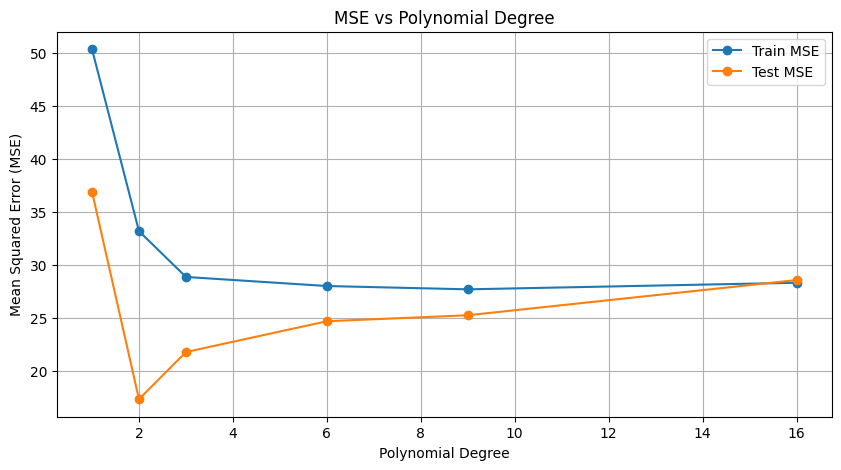

In [40]:
## TODO:

plt.figure(figsize=(10,5))
plt.plot(results_df['degree'], results_df['train_MSE'], marker='o', label='Train MSE')
plt.plot(results_df['degree'], results_df['test_MSE'], marker='o', label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

MSE observations: The training MSE decreases as the degree increases from 1 to 9, showing that higher-degree polynomials fit the training data better. However, the test MSE decreases initially (degree 1 -> 2) but then increases again for higher degrees (degree 3 -> 16), indicating that very high-degree polynomials start overfitting the training data and generalize worse to the test set.

* k) Plot the $R^2$ value vs. $\ell$ for the training dataset. 
* l) Plot the $R^2$ value vs. $\ell$ for the test dataset. 
* m) What do you observe?

#### Answer:

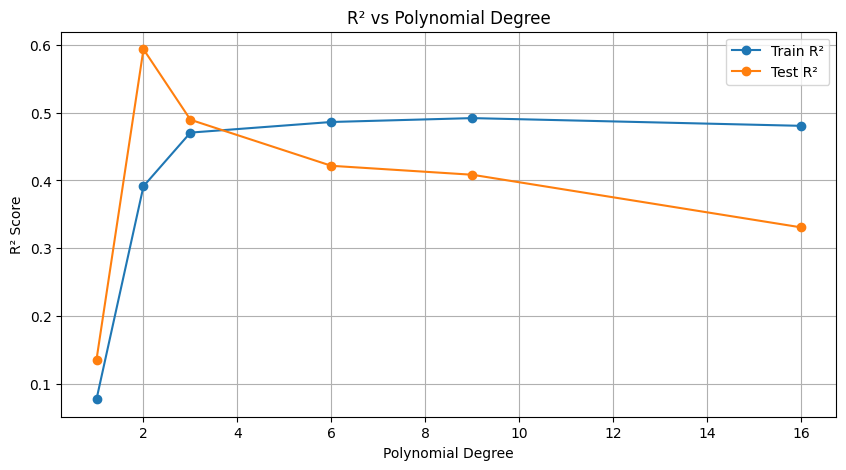

In [41]:
## TODO:

plt.figure(figsize=(10,5))
plt.plot(results_df['degree'], results_df['train_R2'], marker='o', label='Train R²')
plt.plot(results_df['degree'], results_df['test_R2'], marker='o', label='Test R²')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

R² observations: The training R² steadily increases with degree, approaching 0.49–0.49 for higher degrees, reflecting better fit on the training data. The test R² improves from degree 1 to 2 (underfitting decreases), peaks around degree 2–3, and then declines for higher degrees, confirming that overfitting reduces the model’s ability to explain variance in unseen data.

## 📝 Exercise 3: Cross Validation

In this exercise, you will explore different **cross-validation (CV)** strategies for evaluating a model’s generalization ability on small datasets.

Cross-validation helps estimate how well a model trained on one subset of data performs on unseen data.

### Step 1: Define a Toy Dataset

We will work with a very small dataset, defined as: $D_6 = \left\{(1,3),\ (2,4),\ (3,8),\ (4,9),\ (5,12),\ (7,14) \right\}$

Each pair $(x_i, y_i)$ represents an input–output example. 

* a) Store this dataset as `NumPy` arrays or a `Pandas` DataFrame.

#### Answer:

In [15]:
## TODO:

### Step 2: Cross-Validation Splits

In this part, you will explore how different cross-validation strategies divide the dataset into **training and test sets**.

For each method below, print out all train-test index splits and understand how the dataset is divided.

For each method, clearly print:
- The train indices
- The test indices

* b) Leave-One-Out Cross Validation (LOOCV):
   - Use: `LeaveOneOut()` from `sklearn.model_selection`

#### Answer:

In [16]:
## TODO:

* c) 3-Fold Cross Validation:
   - Use: `KFold(n_splits=3)` from `sklearn.model_selection`

#### Answer:

In [17]:
## TODO:

* d) Bootstrap Method:
   - Use: `Bootstrap(n_resamples=5)` from `sklearn.utils`

#### Answer:

In [18]:
## TODO:

### Step 3: Apply Cross-Validation for Model Evaluation

Now you will fit a linear regression model and compute the average test MSE using a specific CV strategy.

* e) Use 2-Fold Cross Validation to estimate the model’s average test error.
   - Use `cross_validate(...)` or `cross_val_score(...)` from `sklearn.model_selection`
   - Use `KFold(n_splits=2)`

Print the MSE for each fold, and compute the average test error across the two folds.

#### Answer:

In [19]:
## TODO:

### Step 4: Apply the same method to the data set below for the **TV-sales** pair:

The dataset "Advertising.csv" can be downloaded from: http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

In [20]:
directory = #your directory
prefix = "Advertising.csv"
filename1 = directory+prefix
dataAd = np.loadtxt(filename1, delimiter=",",skiprows=1,usecols=[1,2,3,4])

SyntaxError: invalid syntax (1311855566.py, line 1)

In [ ]:
# pandas
pdAd = pd.DataFrame(dataAd, columns=["TV","radio","newspaper","sales"])

In [ ]:
TV = pdAd.iloc[:,0].values
#radio = pdAd.iloc[:,1].values
#news = pdAd.iloc[:,2].values
sales = pdAd.iloc[:,3].values

#### **Answer:**

In [ ]:
## TODO: